## 1. Importing Liberaries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

#plt.style.use('Solarize_Light2')

## 2. Loading Data

In [60]:
customer=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Customers.csv')
print(customer.shape)
customer.head()

(200, 4)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [61]:
products=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Products.csv')
print(products.shape)
products.head()

(100, 4)


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [62]:
transactions=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/Transactions.csv')
print(transactions.shape)
transactions.head()

(1000, 7)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Exploring Customers data

In [63]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [64]:
customer.duplicated().sum()

0

In [65]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


##### Insight 1

In [66]:
# changing the datatype of SignupDate to DateTime
customer['SignupDate']=pd.to_datetime(customer['SignupDate'])
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [67]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [68]:
customer['Year']=customer['SignupDate'].dt.year
customer['Month']=customer['SignupDate'].dt.month
customer['day']=customer['SignupDate'].dt.day

In [69]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate,Year,Month,day
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022,2,13
2,C0003,Michael Rivera,South America,2024-03-07,2024,3,7
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022,10,9
4,C0005,Laura Weber,Asia,2022-08-15,2022,8,15


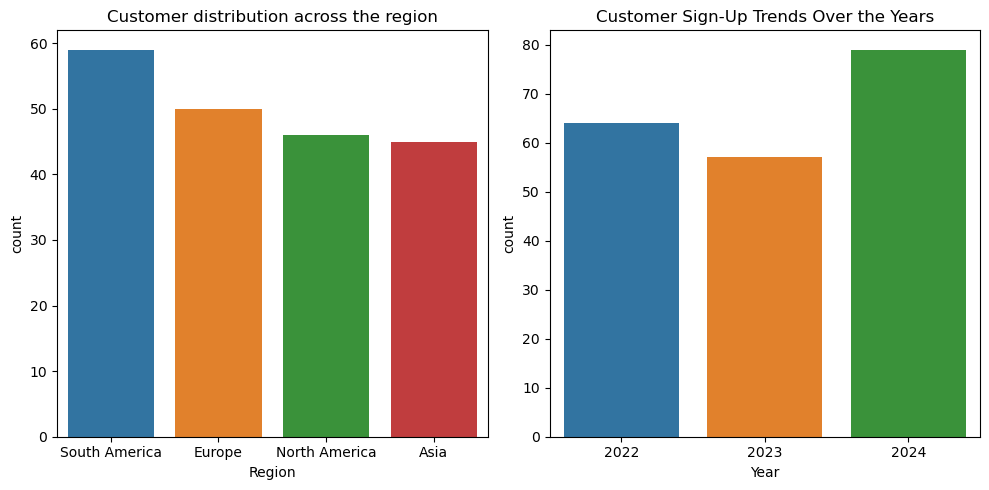

In [461]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=customer,x="Region",order=['South America','Europe','North America','Asia'],ax=axs[0])
axs[0].set_title('Customer distribution across the region')

sns.countplot(data=customer,x='Year',ax=axs[1])
axs[1].set_title("Customer Sign-Up Trends Over the Years")


fig.tight_layout()
plt.savefig('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/insight 1.png')
plt.show()

In [71]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate,Year,Month,day
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022,2,13
2,C0003,Michael Rivera,South America,2024-03-07,2024,3,7
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022,10,9
4,C0005,Laura Weber,Asia,2022-08-15,2022,8,15


### exploring products

In [72]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [73]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [74]:
products.Category.value_counts()

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

In [75]:
products.ProductName.value_counts()

ActiveWear Smartwatch         4
SoundWave Headphones          4
BookWorld Biography           3
TechPro T-Shirt               3
SoundWave Cookbook            3
                             ..
BookWorld Jacket              1
ComfortLiving Smartphone      1
SoundWave T-Shirt             1
ComfortLiving Cookware Set    1
SoundWave Laptop              1
Name: ProductName, Length: 66, dtype: int64

In [383]:
#Merging all three data
data=pd.merge(customer,transactions,how='inner',on='CustomerID')
data.rename(columns={'Price':'transaction_price'},inplace=True)


In [384]:
data=pd.merge(data,products,how='inner',on='ProductID')
data.rename(columns={'Price':'product_price'},inplace=True)
data.head()


,CustomerID,CustomerName,Region,SignupDate,Year,Month,day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,transaction_price,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00015,P054,2024-01-19 03:12:55,2,114.6,57.3,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,2023,1,12,T00423,P054,2024-11-08 10:22:51,3,171.9,57.3,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,2022,4,16,T00395,P054,2024-03-14 08:10:08,3,171.9,57.3,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,2024,10,13,T00053,P054,2024-09-30 14:42:16,3,171.9,57.3,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,2024,3,22,T00784,P054,2024-08-23 09:06:06,3,171.9,57.3,SoundWave Cookbook,Books,57.3


In [78]:
data.shape

(1000, 16)

In [81]:
data.describe()

,Year,Month,day,Quantity,TotalValue,transaction_price,product_price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,2023.055000,6.120000,14.799000,2.537000,689.995560,272.55407,272.55407
std,0.846576,3.422472,7.922965,1.117981,493.144478,140.73639,140.73639
min,2022.000000,1.000000,1.000000,1.000000,16.080000,16.08000,16.08000
25%,2022.000000,3.000000,9.000000,2.000000,295.295000,147.95000,147.95000
50%,2023.000000,5.000000,14.500000,3.000000,588.880000,299.93000,299.93000
75%,2024.000000,9.000000,21.000000,4.000000,1011.660000,404.40000,404.40000
max,2024.000000,12.000000,31.000000,4.000000,1991.040000,497.76000,497.76000


In [391]:
# droping  transaction_price
data.drop('transaction_price',axis=1,inplace=True)
data.head()

,CustomerID,CustomerName,Region,SignupDate,Year,Month,day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00015,P054,2024-01-19 03:12:55,2,114.6,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,2023,1,12,T00423,P054,2024-11-08 10:22:51,3,171.9,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,2022,4,16,T00395,P054,2024-03-14 08:10:08,3,171.9,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,2024,10,13,T00053,P054,2024-09-30 14:42:16,3,171.9,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,2024,3,22,T00784,P054,2024-08-23 09:06:06,3,171.9,SoundWave Cookbook,Books,57.3


### insight 2

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   object        
 1   CustomerName     1000 non-null   object        
 2   Region           1000 non-null   object        
 3   SignupDate       1000 non-null   datetime64[ns]
 4   Year             1000 non-null   int64         
 5   Month            1000 non-null   int64         
 6   day              1000 non-null   int64         
 7   TransactionID    1000 non-null   object        
 8   ProductID        1000 non-null   object        
 9   TransactionDate  1000 non-null   object        
 10  Quantity         1000 non-null   int64         
 11  TotalValue       1000 non-null   float64       
 12  ProductName      1000 non-null   object        
 13  Category         1000 non-null   object        
 14  product_price    1000 non-null   float64 

In [84]:
data.describe()

,Year,Month,day,Quantity,TotalValue,product_price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2023.055000,6.120000,14.799000,2.537000,689.995560,272.55407
std,0.846576,3.422472,7.922965,1.117981,493.144478,140.73639
min,2022.000000,1.000000,1.000000,1.000000,16.080000,16.08000
25%,2022.000000,3.000000,9.000000,2.000000,295.295000,147.95000
50%,2023.000000,5.000000,14.500000,3.000000,588.880000,299.93000
75%,2024.000000,9.000000,21.000000,4.000000,1011.660000,404.40000
max,2024.000000,12.000000,31.000000,4.000000,1991.040000,497.76000


## Max totalValue

In [87]:
data[data['TotalValue']==data['TotalValue'].max()]

,CustomerID,CustomerName,Region,SignupDate,Year,Month,day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
874,C0082,Aimee Taylor,South America,2022-05-13,2022,5,13,T00928,P075,2024-09-06 18:39:07,4,1991.04,TechPro Textbook,Books,497.76


# EDA on Region

## max total value from each region

In [90]:
grouped_region=data.groupby('Region')

In [387]:
grp_region=grouped_region.agg(np.max)

In [388]:
grp_region.head()

,CustomerID,CustomerName,SignupDate,Year,Month,day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
Region,,,,,,,,,,,,,,
Asia,C0200,Wayne Stone,2024-11-13,2024,12,30,T00994,P100,2024-12-28 11:00:00,4,1818.12,TechPro Vase,Home Decor,497.76
Europe,C0199,Wayne Ferguson,2024-12-28,2024,12,28,T00997,P099,2024-12-27 18:20:31,4,1927.12,TechPro Vase,Home Decor,497.76
North America,C0194,Zachary Turner,2024-11-22,2024,12,30,T00999,P100,2024-12-26 01:49:16,4,1954.52,TechPro Vase,Home Decor,497.76
South America,C0195,William Walker,2024-11-22,2024,12,31,T01000,P100,2024-12-27 17:31:24,4,1991.04,TechPro Vase,Home Decor,497.76


## total sales from each region

In [363]:
grouped_region.TotalValue.agg(np.sum)

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

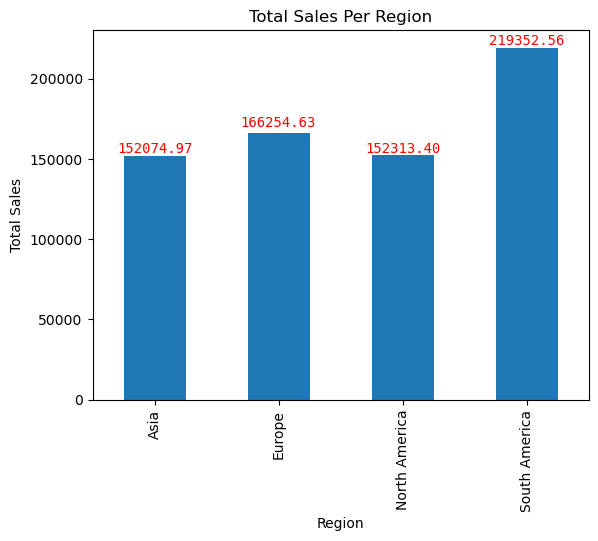

In [462]:
fig=grouped_region.TotalValue.agg(np.sum).plot(kind='bar')
fig.text(-0.3,154000,s="152074.97",fontdict={'family': 'monospace','c':'red'})
fig.text(0.69,170000,s="166254.63",fontdict={'family': 'monospace','c':'red'})
fig.text(1.7,154000,s="152313.40",fontdict={'family': 'monospace','c':'red'})
fig.text(2.7,221000.56,s="219352.56",fontdict={'family': 'monospace','c':'red'})
plt.title('Total Sales Per Region')
plt.ylabel('Total Sales')
plt.savefig('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/insight_2.png')
plt.show()

In [115]:
grouped_region.TotalValue.agg(np.sum)

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

In [119]:
grouped_region.Quantity.agg(np.sum)

Region
Asia             560
Europe           595
North America    593
South America    789
Name: Quantity, dtype: int64

## EDA on category

### <font color='green'> Total sales by category </font>

In [120]:
data.groupby('Category').agg(np.sum)

,Year,Month,day,Quantity,TotalValue,product_price
Category,,,,,,
Books,546203,1637,3790,681,192147.47,75742.08
Clothing,461252,1333,3765,590,166170.66,64547.77
Electronics,513870,1631,3754,627,180783.50,73335.39
Home Decor,501730,1519,3490,639,150893.93,58928.83


In [158]:
new=pd.DataFrame(data.groupby('Category').TotalValue.agg(np.sum))
new

,TotalValue
Category,
Books,192147.47
Clothing,166170.66
Electronics,180783.50
Home Decor,150893.93


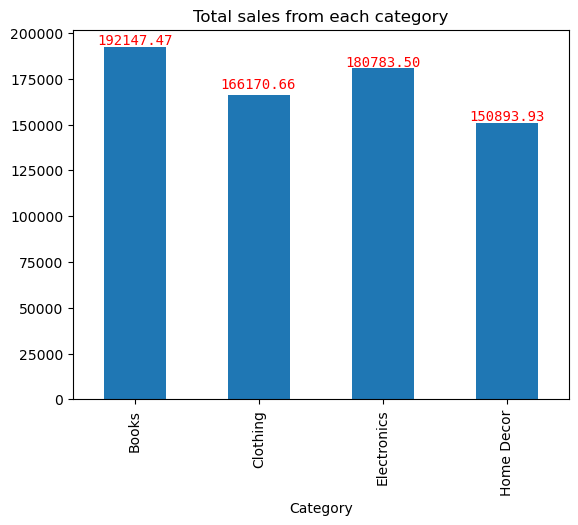

In [463]:
plt.figure()
fig=data.groupby('Category').TotalValue.agg(np.sum).plot(kind='bar')
fig.text(-0.3,194000,s="192147.47",fontdict={'family': 'monospace','c':'red'})
fig.text(0.69,170000,s="166170.66",fontdict={'family': 'monospace','c':'red'})
fig.text(1.7,182000,s="180783.50",fontdict={'family': 'monospace','c':'red'})
fig.text(2.7,152000,s="150893.93",fontdict={'family': 'monospace','c':'red'})
fig.set_title('Total sales from each category')
plt.savefig('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/insight_2b.png')
plt.show()

### <font color='green'> maximum sales by category </font>

In [136]:
data.groupby('Category').agg(np.max)

,CustomerID,CustomerName,Region,SignupDate,Year,Month,day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,product_price
Category,,,,,,,,,,,,,,
Books,C0200,William Adams,South America,2024-12-28,2024,12,31,T00995,P099,2024-12-26 06:46:12,4,1991.04,TechPro Textbook,497.76
Clothing,C0200,Zachary Turner,South America,2024-12-28,2024,12,31,T00999,P100,2024-12-26 01:49:16,4,1927.12,TechPro T-Shirt,481.78
Electronics,C0200,William Walker,South America,2024-12-28,2024,12,31,T01000,P098,2024-12-28 11:00:00,4,1839.44,TechPro Smartwatch,459.86
Home Decor,C0200,William Walker,South America,2024-12-28,2024,12,31,T00998,P095,2024-12-27 17:31:24,4,1818.12,TechPro Vase,454.53


In [137]:
data.groupby('Category').TotalValue.agg(np.max)

Category
Books          1991.04
Clothing       1927.12
Electronics    1839.44
Home Decor     1818.12
Name: TotalValue, dtype: float64

In [139]:
data.head()

,CustomerID,CustomerName,Region,SignupDate,Year,Month,day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00015,P054,2024-01-19 03:12:55,2,114.6,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,2023,1,12,T00423,P054,2024-11-08 10:22:51,3,171.9,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,2022,4,16,T00395,P054,2024-03-14 08:10:08,3,171.9,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,2024,10,13,T00053,P054,2024-09-30 14:42:16,3,171.9,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,2024,3,22,T00784,P054,2024-08-23 09:06:06,3,171.9,SoundWave Cookbook,Books,57.3


Text(0.5, 1.0, 'Distribution of each category across region')

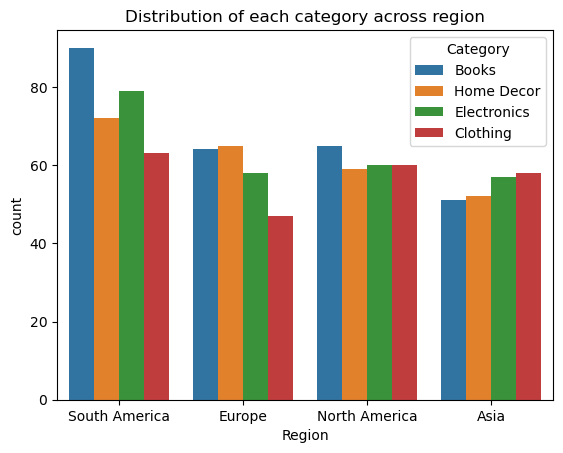

In [211]:
sns.countplot(data=data,x='Region',hue='Category').set_title('Distribution of each category across region')

## EDA on ProductName

In [143]:
print('There are number of products : ',len(data.ProductName.unique()))

There are number of products :  66


In [147]:
print('Product Names : \n\n',data.ProductName.unique())

Product Names : 

 ['SoundWave Cookbook' 'HomeSense Wall Art' 'SoundWave Headphones'
 'ActiveWear Smartwatch' 'TechPro Headphones' 'BookWorld Cookware Set'
 'BookWorld Rug' 'ComfortLiving Sweater' 'TechPro T-Shirt'
 'ActiveWear Cookware Set' 'ActiveWear Rug' 'ActiveWear T-Shirt'
 'TechPro Textbook' 'TechPro Rug' 'TechPro Vase' 'BookWorld Cookbook'
 'BookWorld Bluetooth Speaker' 'TechPro Smartwatch'
 'ComfortLiving Headphones' 'SoundWave Mystery Book' 'ActiveWear Wall Art'
 'SoundWave Novel' 'ActiveWear Jacket' 'ComfortLiving Bluetooth Speaker'
 'TechPro Novel' 'SoundWave Jacket' 'HomeSense Cookware Set'
 'SoundWave Bluetooth Speaker' 'HomeSense T-Shirt' 'SoundWave Jeans'
 'BookWorld Jacket' 'HomeSense Sweater' 'ActiveWear Cookbook'
 'ActiveWear Textbook' 'HomeSense Bluetooth Speaker' 'BookWorld Biography'
 'BookWorld Sweater' 'ComfortLiving Smartphone' 'HomeSense Desk Lamp'
 'ComfortLiving Biography' 'SoundWave Desk Lamp' 'ActiveWear Headphones'
 'HomeSense Headphones' 'HomeSense Runni

In [217]:
grp_product=data.groupby('ProductName').agg(np.sum)

In [225]:
pd.set_option('display.max_rows',None)
grp_product.sort_values(by="TotalValue",ascending=False)[:10]

,Year,Month,day,Quantity,TotalValue,product_price
ProductName,,,,,,
ActiveWear Smartwatch,80924,276,559,100,39096.97,15977.27
SoundWave Headphones,76884,257,516,97,25211.64,10025.71
SoundWave Novel,40462,137,312,58,24507.90,8414.70
ActiveWear Jacket,52605,153,431,76,22712.56,7896.12
ActiveWear Rug,58665,194,335,79,22314.43,8255.08
TechPro Headphones,34392,111,186,45,19513.80,7371.88
BookWorld Cookbook,40457,136,247,48,19221.99,8248.99
BookWorld Sweater,38437,130,319,47,18743.79,7632.27
TechPro Textbook,50572,167,315,62,18267.96,7196.85


Text(0.5, 1.0, 'Top 8 Best-Selling Products')

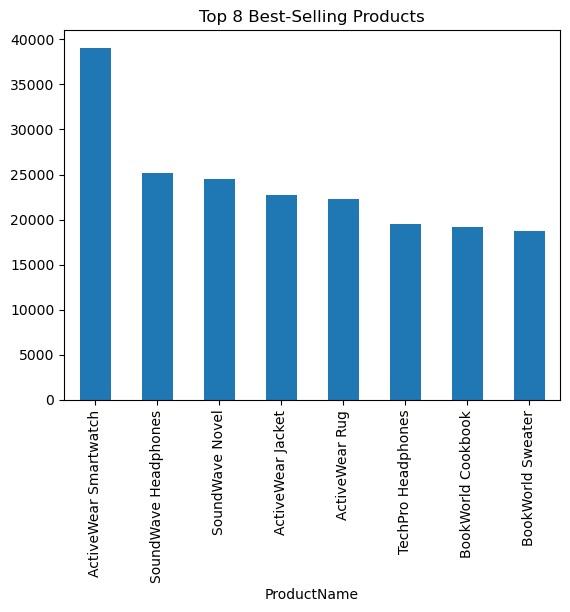

In [256]:
grp_product.sort_values(by="TotalValue",ascending=False)[:8].TotalValue.plot(kind='bar')
plt.title('Top 8 Best-Selling Products')

## EDA on Year

In [258]:
data.head()

,CustomerID,CustomerName,Region,SignupDate,Year,Month,day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00015,P054,2024-01-19 03:12:55,2,114.6,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,2023,1,12,T00423,P054,2024-11-08 10:22:51,3,171.9,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,2022,4,16,T00395,P054,2024-03-14 08:10:08,3,171.9,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,2024,10,13,T00053,P054,2024-09-30 14:42:16,3,171.9,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,2024,3,22,T00784,P054,2024-08-23 09:06:06,3,171.9,SoundWave Cookbook,Books,57.3


In [266]:
data.groupby('Year').agg(np.sum)

,Month,day,Quantity,TotalValue,product_price
Year,,,,,
2022,2010,4683,846,225840.04,89968.37
2023,1714,4173,711,196794.01,77164.93
2024,2396,5943,980,267361.51,105420.77


In [306]:
year_2024=data[data.Year==2024].sort_values(by='Month').groupby('Month').agg(np.sum)
year_2024.reset_index(inplace=True)
year_2023=data[data.Year==2023].sort_values(by='Month').groupby('Month').agg(np.sum).reset_index()
year_2022=data[data.Year==2022].sort_values(by='Month').groupby('Month').agg(np.sum).reset_index()

,Month,Year,day,Quantity,TotalValue,product_price
0,1,87032,807,97,25989.57,11530.68
1,2,70840,483,81,21180.87,9137.98
2,3,40480,272,56,12963.74,4952.30
3,4,97152,438,119,33998.06,14232.09
4,5,68816,633,89,25462.38,9437.33
5,6,28336,269,38,10570.45,3817.00
6,7,72864,547,90,25602.75,9806.64
7,8,40480,245,51,14240.67,5765.51
8,9,117392,1019,144,35991.60,14584.19
9,10,62744,573,72,19316.67,8218.14


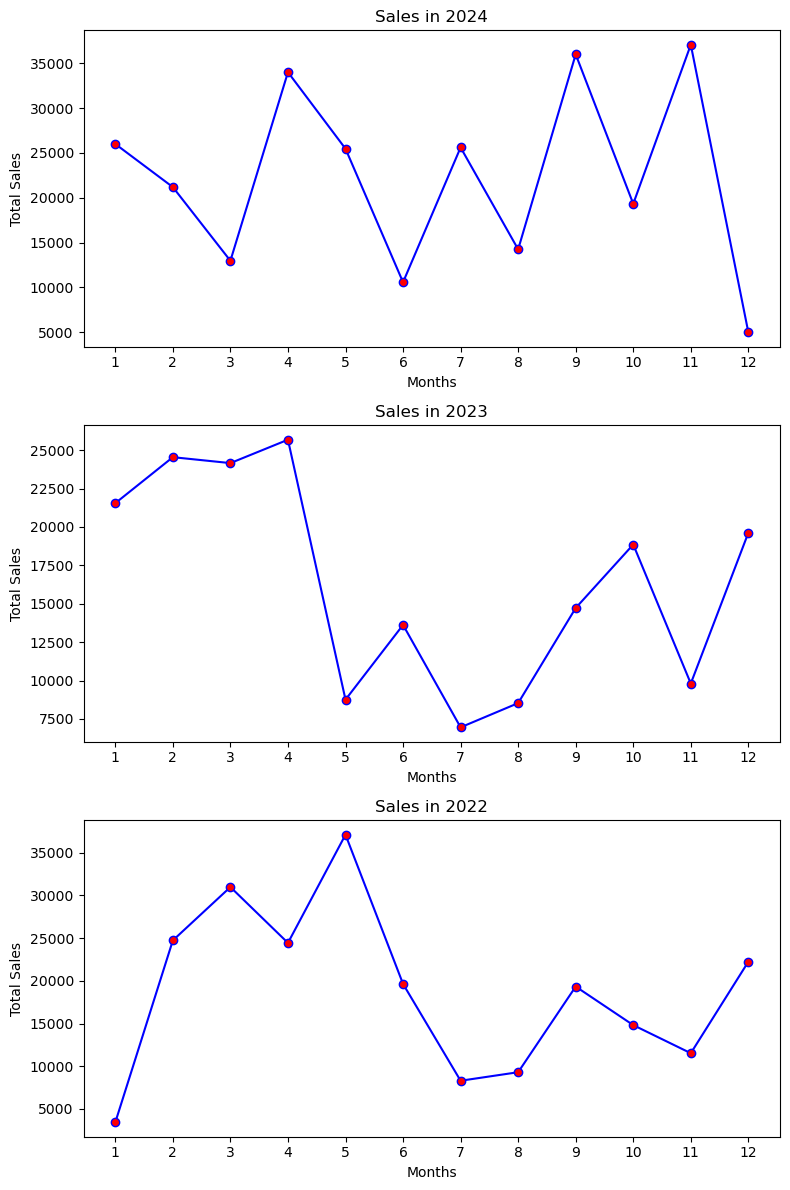

In [464]:
fig,axs=plt.subplots(3,1,figsize=(8,12))
axs[0].plot(year_2024['Month'] ,year_2024['TotalValue'],marker='o',c='b',mfc='r')
axs[0].set_title('Sales in 2024')
axs[0].set_xticks(np.arange(1,13))
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Total Sales')

axs[1].plot(year_2023['Month'] ,year_2023['TotalValue'],marker='o',c='b',mfc='r')
axs[1].set_title('Sales in 2023')
axs[1].set_xticks(np.arange(1,13))
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Total Sales')

axs[2].plot(year_2022['Month'] ,year_2022['TotalValue'],marker='o',c='b',mfc='r')
axs[2].set_title('Sales in 2022')
axs[2].set_xticks(np.arange(1,13))
axs[2].set_xlabel('Months')
axs[2].set_ylabel('Total Sales')

plt.tight_layout()
plt.savefig('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/insight_3b.png')
plt.show()

In [361]:
data.head()

,CustomerID,CustomerName,Region,SignupDate,Year,Month,day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,product_price
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00015,P054,2024-01-19 03:12:55,2,114.6,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,2023,1,12,T00423,P054,2024-11-08 10:22:51,3,171.9,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,2022,4,16,T00395,P054,2024-03-14 08:10:08,3,171.9,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,2024,10,13,T00053,P054,2024-09-30 14:42:16,3,171.9,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,2024,3,22,T00784,P054,2024-08-23 09:06:06,3,171.9,SoundWave Cookbook,Books,57.3


## Breakdown of sales in every region by category

In [397]:
data[data.Region=='Asia'].groupby('Category').agg(np.sum).sort_values('TotalValue',ascending=False)

,Year,Month,day,Quantity,TotalValue,product_price
Category,,,,,,
Clothing,117335,328,1014,166,49353.09,17200.90
Electronics,115312,379,1024,132,35658.15,16067.60
Home Decor,105195,323,822,142,33944.70,12231.84
Books,103180,312,722,120,33119.03,13639.69


Text(0.5, 1.0, 'Breakdown of Total Sales in Asia by Product Category')

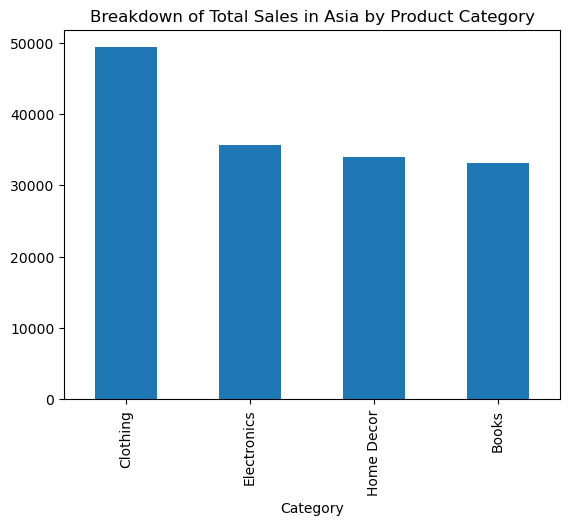

In [398]:
data[data.Region=='Asia'].groupby('Category').agg(np.sum).sort_values('TotalValue',ascending=False).TotalValue.plot(kind='bar')
plt.title('Breakdown of Total Sales in Asia by Product Category')

Text(0.5, 1.0, 'Breakdown of Total Sales in Europe by Product Category')

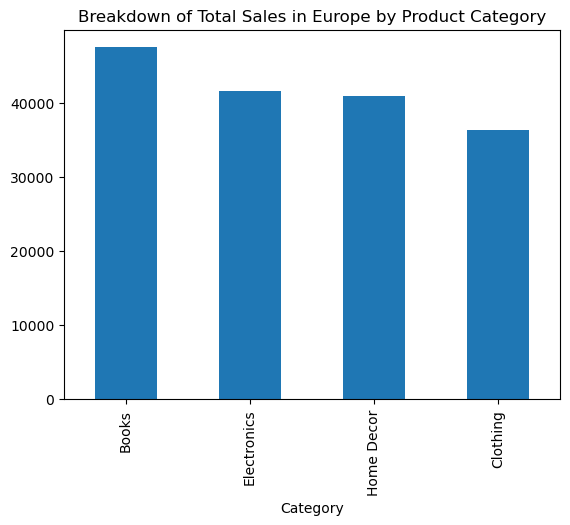

In [411]:
data[data.Region=='Europe'].groupby('Category').agg(np.sum).sort_values('TotalValue',ascending=False).TotalValue.plot(kind='bar')
plt.title('Breakdown of Total Sales in Europe by Product Category')

In [406]:
data.Region.unique()

array(['South America', 'Europe', 'North America', 'Asia'], dtype=object)

Text(0.5, 1.0, 'Breakdown of Total Sales in South America by Product Category')

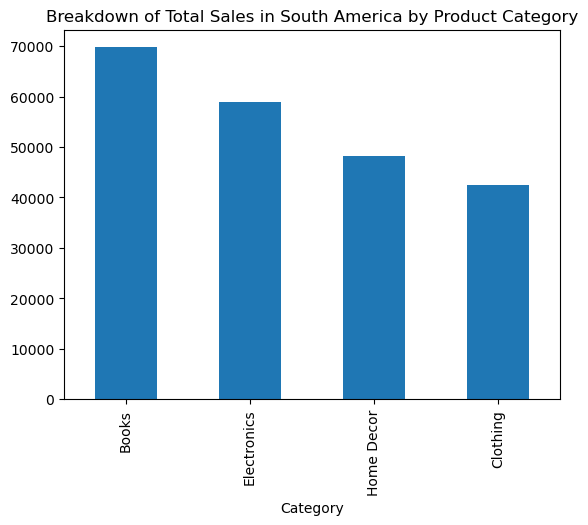

In [410]:
data[data.Region=='South America'].groupby('Category').agg(np.sum).sort_values('TotalValue',ascending=False).TotalValue.plot(kind='bar')
plt.title('Breakdown of Total Sales in South America by Product Category')

Text(0.5, 1.0, 'Breakdown of Total Sales in North America by Product Category')

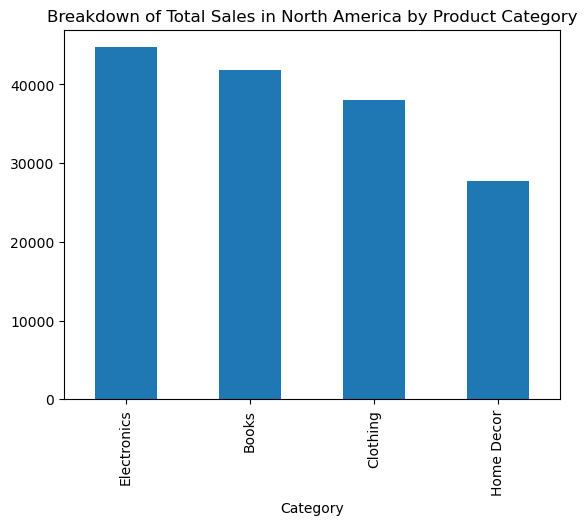

In [417]:
data[data.Region=='North America'].groupby('Category').agg(np.sum).sort_values('TotalValue',ascending=False).TotalValue.plot(kind='bar')
plt.title('Breakdown of Total Sales in North America by Product Category')

Breakdown of Total Sales in Each Region by Product Category


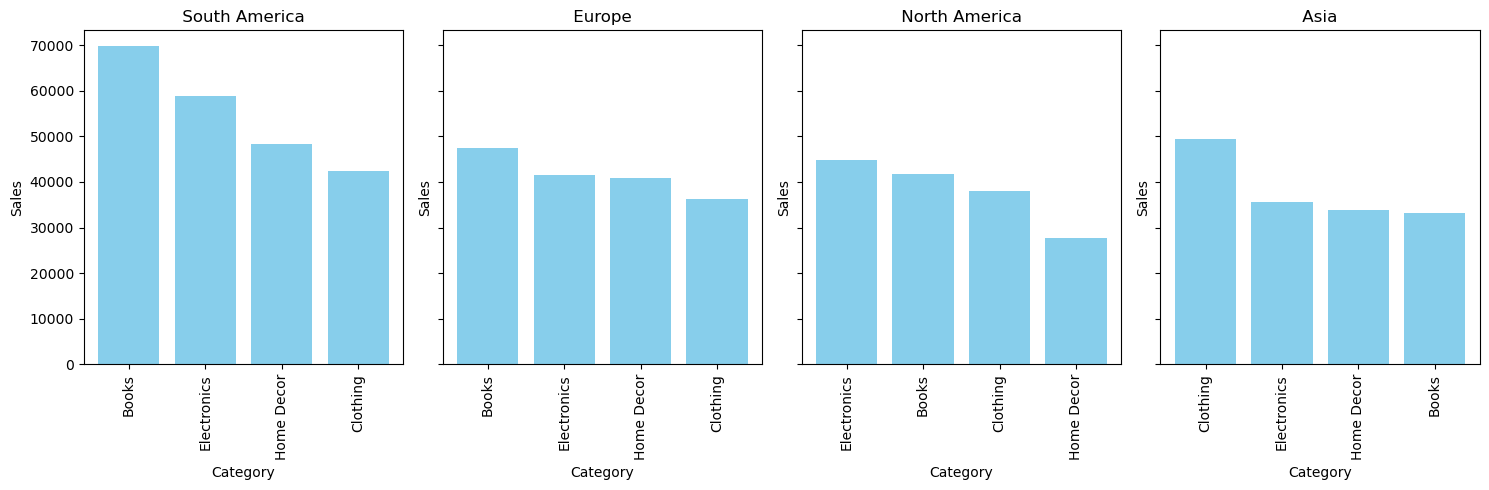

In [465]:
regions=data['Region'].unique()
print('Breakdown of Total Sales in Each Region by Product Category')
fig,axs=plt.subplots(1,len(regions),figsize=(15,5),sharey=True)
for i in range(len(regions)):
    category_sales=data[data.Region==regions[i]].groupby('Category').agg(np.sum).sort_values('TotalValue',ascending=False)
    axs[i].bar(category_sales.index, category_sales['TotalValue'], color='skyblue')
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_xlabel('Category')
    axs[i].set_ylabel('Sales')
    axs[i].set_title(f' {regions[i]} ')
   
plt.tight_layout()    
plt.savefig('C:/Users/HP/OneDrive/Desktop/Zeotap Assignment/insight_4b.png')
plt.show()